# Problem 2

In [1]:
#import the nescessary libs
import numpy as np
import torch

# Loading the Fashion-MNIST dataset
from torchvision import datasets, transforms

# Get GPU Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize((0.5,), (0.5,))
                                                                   ])
# Download and load the training data
trainset = datasets.FashionMNIST('MNIST_data/', download = True, train = True, transform = transform)
testset = datasets.FashionMNIST('MNIST_data/', download = True, train = False, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 32, shuffle = True, num_workers=4)
testloader = torch.utils.data.DataLoader(testset, batch_size = 32, shuffle = True, num_workers=4)

# Examine a sample
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Define the network architecture
from torch import nn, optim
import torch.nn.functional as F

a = []

def hookFunc(module, gradInput, gradOutput):
  a.append(gradInput)

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 10),
                      #nn.LogSoftmax(dim = 1)
                     )

#model[1].register_backward_hook(print_grad(model[1]))
model[1].register_backward_hook(hookFunc)

model.to(device)

# Define the loss
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr = 0.001)

# Define the epochs
epochs = 5

train_losses, test_losses = [], []

# initialize the array for the graph
outputs = []

for e in range(epochs):
  running_loss = 0
  relu0 = []
  a = []
  count = 0
  for images, labels in trainloader:
    count +=1
    # Flatten Fashion-MNIST images into a 784 long vector
    images = images.to(device)
    labels = labels.to(device)
    images = images.view(images.shape[0], -1)
    
    # Training pass
    optimizer.zero_grad()
    
    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward()

    optimizer.step()
    
    running_loss += loss.item()
  else:
    ## Squared Sum of Gradient
    value = 0
    # First, go through all of the runs for for loop in trainloader
    for i in range(len(a)): 
      # Then for each batch, add the square sum of gradients 
      for j in range(len(a[i][0])): 
        value = value + torch.sum(torch.square(a[i][0][j]))
    # Save the gradient value
    outputs.append(value)
    test_loss = 0
    accuracy = 0
    test = []
    # Turn off gradients for validation, saves memory and computation
    with torch.no_grad():
      # Set the model to evaluation mode
      model.eval()
      
      # Validation pass
      for images, labels in testloader:
        images = images.to(device)
        labels = labels.to(device)
        images = images.view(images.shape[0], -1)
        # Result from Model equivalent to test4
        ps = model(images)

        

        test_loss += criterion(ps, labels)
        top_p, top_class = ps.topk(1, dim = 1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
    
    model.train()

    print("Epoch: {}/{}..".format(e+1, epochs),
          "Training loss: {:.3f}..".format(running_loss/len(trainloader)),
          "Test loss: {:.3f}..".format(test_loss/len(testloader)),
          "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch: 1/5.. Training loss: 0.483.. Test loss: 0.411.. Test Accuracy: 0.852
Epoch: 2/5.. Training loss: 0.373.. Test loss: 0.381.. Test Accuracy: 0.864
Epoch: 3/5.. Training loss: 0.337.. Test loss: 0.369.. Test Accuracy: 0.866
Epoch: 4/5.. Training loss: 0.315.. Test loss: 0.371.. Test Accuracy: 0.867
Epoch: 5/5.. Training loss: 0.296.. Test loss: 0.365.. Test Accuracy: 0.871


In [2]:
print(len(a),len(a[0]),len(a[0][0]),len(a[0][0][0]))
#val = 0
#for i in range(len(a)):
#  for j in range(len(a[i][0])):
#    for k in range(len(a[i][0][j]))
#       val += a[i][0][j][k] * a[i][0][j][k]
a[0][0][0][0]

1875 1 32 128


tensor(0., device='cuda:0')

In [3]:
a

[(tensor([[ 0.0000e+00, -1.2238e-03,  0.0000e+00,  ...,  2.8118e-03,
           -3.4869e-04,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00, -5.4837e-10,  ...,  0.0000e+00,
            3.1687e-11,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  3.4887e-04,  ...,  0.0000e+00,
           -3.7936e-05,  0.0000e+00],
          ...,
          [ 0.0000e+00,  5.1079e-04,  9.4923e-04,  ..., -2.3845e-03,
           -1.1015e-03,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           -8.6809e-10,  0.0000e+00],
          [ 0.0000e+00,  1.3078e-05,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00]], device='cuda:0'),),
 (tensor([[ 0.0000e+00,  0.0000e+00,  7.0275e-09,  ...,  0.0000e+00,
            0.0000e+00,  1.1089e-08],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
            3.5857e-06,  0.0000e+00],
          [ 0.0000e+00, -3.3003e-05,  0.0000e+00,  ...,  0.0000e+00,
            0.0000e+00,  0.0000e+00],
 

In [4]:
a[0]

(tensor([[ 0.0000e+00, -1.2238e-03,  0.0000e+00,  ...,  2.8118e-03,
          -3.4869e-04,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00, -5.4837e-10,  ...,  0.0000e+00,
           3.1687e-11,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  3.4887e-04,  ...,  0.0000e+00,
          -3.7936e-05,  0.0000e+00],
         ...,
         [ 0.0000e+00,  5.1079e-04,  9.4923e-04,  ..., -2.3845e-03,
          -1.1015e-03,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          -8.6809e-10,  0.0000e+00],
         [ 0.0000e+00,  1.3078e-05,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00]], device='cuda:0'),)

In [5]:
a[0][0]

tensor([[ 0.0000e+00, -1.2238e-03,  0.0000e+00,  ...,  2.8118e-03,
         -3.4869e-04,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -5.4837e-10,  ...,  0.0000e+00,
          3.1687e-11,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  3.4887e-04,  ...,  0.0000e+00,
         -3.7936e-05,  0.0000e+00],
        ...,
        [ 0.0000e+00,  5.1079e-04,  9.4923e-04,  ..., -2.3845e-03,
         -1.1015e-03,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
         -8.6809e-10,  0.0000e+00],
        [ 0.0000e+00,  1.3078e-05,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]], device='cuda:0')

In [6]:
a[0][0][0]

tensor([ 0.0000e+00, -1.2238e-03,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         2.6243e-04,  0.0000e+00,  0.0000e+00,  0.0000e+00, -2.7311e-03,
         0.0000e+00,  1.1883e-03,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        -2.9735e-03,  0.0000e+00, -8.8680e-04,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00, -5.6293e-04,  3.3016e-04,  0.0000e+00,
         0.0000e+00,  5.8576e-03,  4.8513e-04,  0.0000e+00,  0.0000e+00,
         7.8098e-03, -2.1910e-03,  0.0000e+00, -4.3242e-04,  0.0000e+00,
        -1.4137e-03,  0.0000e+00,  0.0000e+00,  0.0000e+00, -8.2569e-05,
         0.0000e+00,  0.0000e+00, -2.9492e-03,  0.0000e+00, -1.9130e-03,
         0.0000e+00, -1.6730e-03,  0.0000e+00,  0.0000e+00, -5.5827e-05,
         0.0000e+00, -7.9830e-04,  0.0000e+00,  0.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00, -7.5529e-04,  0.0

In [7]:
a[0][0][0][0]

tensor(0., device='cuda:0')

In [8]:
value = 0

for i in range(len(a)): 
  for j in range(len(a[i][0])): 
    value = value + torch.sum(torch.square(a[i][0][j]))

In [9]:
value

tensor(2.4235, device='cuda:0')

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

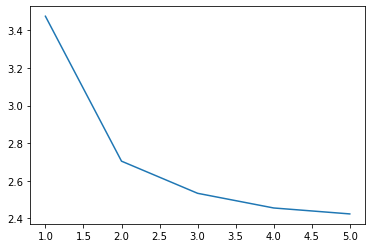

In [11]:
epochs = [1,2,3,4,5]
plt.plot(epochs,outputs)

a = []
for i in outputs:
  a.append(i.item())
outputs = a

df = pd.DataFrame(list(zip(epochs, outputs)),
              columns=['Epoch','Squared_Sum'])
df.to_csv('prob2-2.csv')